<a href="https://colab.research.google.com/github/missingstuffedbun/detr/blob/main/detrwithcustomized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite

In [55]:
!pip install --upgrade pycocotools
import os
from google.colab import drive
import pandas as pd
import json
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [81]:
! rm -rf detr && git clone https://github.com/missingstuffedbun/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 358 (delta 32), reused 0 (delta 0), pack-reused 299
Receiving objects: 100% (358/358), 12.89 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (196/196), done.


In [ ]:
# %%bash
# mkdir -p output
# mkdir -p output/0
# wget https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth -P output/0/

# Car Dataset

In [ ]:
%%bash
rm -rf /content/给选手数据
rm -rf /content/working
unzip toUser_第二批V2.zip -d /content
mkdir -p /content/working
mkdir -p /content/working/train
mkdir -p /content/working/test
mkdir -p /content/working/val

In [75]:
! python detr/car2coco.py
os.chdir("/content/drive/MyDrive/Colab Notebooks")

['Sen_ship_hh_02016102701031047.txt', 'Gao_ship_hh_020170901300808016.txt', 'Gao_ship_hh_020171118980305019.txt', 'Sen_ship_vh_02018011301041015.txt', 'Gao_ship_hh_02017092243030201.txt', 'Gao_ship_hh_0201801158702023035.txt', 'Sen_ship_hv_02018012601021025.txt', 'Sen_ship_hh_02016122601029047.txt', 'Sen_ship_hh_02017102201022040.txt', 'Gao_ship_hv_020160825440407014.txt', 'newship090202.txt', 'Gao_ship_vv_02017010717030805.txt', 'Gao_ship_hv_02017092778020606.txt', 'Gao_ship_hh_0201710200401013010.txt', 'Sen_ship_hh_02017010701034040.txt', 'newship05021027.txt', 'Sen_ship_hv_02016110801055011.txt', 'Sen_ship_hh_02016121401014037.txt', 'Gao_ship_hv_0201801158702026032.txt', 'Sen_ship_hv_02016091501027019.txt', 'Sen_ship_hv_02016082201034041.txt', 'Sen_ship_hh_02016091501018011.txt', 'Sen_ship_hh_02017112701024028.txt', 'Gao_ship_hv_020170215800509010.txt', 'Gao_ship_hv_020160825440106063.txt', 'Sen_ship_hh_0201610220101040.txt', 'Sen_ship_hh_02017041301024044.txt', 'Gao_ship_hv_0201803

# Sarship Dataset

In [82]:
%%bash
rm -rf /content/working
mkdir -p /content/working
tar -C /content/working/ -xf ./sarship/train.tar
tar -C /content/working/ -xf ./sarship/val.tar
tar -C /content/working/ -xf ./sarship/test.tar
tar -C /content/working/ -xf ./sarship/labels.tar

In [83]:
! python detr/sarship2coco.py
os.chdir("/content/drive/MyDrive/Colab Notebooks")

['Sen_ship_hh_02016102701031047.txt', 'Gao_ship_hh_020170901300808016.txt', 'Gao_ship_hh_020171118980305019.txt', 'Sen_ship_vh_02018011301041015.txt', 'Gao_ship_hh_02017092243030201.txt', 'Gao_ship_hh_0201801158702023035.txt', 'Sen_ship_hv_02018012601021025.txt', 'Sen_ship_hh_02016122601029047.txt', 'Sen_ship_hh_02017102201022040.txt', 'Gao_ship_hv_020160825440407014.txt', 'newship090202.txt', 'Gao_ship_vv_02017010717030805.txt', 'Gao_ship_hv_02017092778020606.txt', 'Gao_ship_hh_0201710200401013010.txt', 'Sen_ship_hh_02017010701034040.txt', 'newship05021027.txt', 'Sen_ship_hv_02016110801055011.txt', 'Sen_ship_hh_02016121401014037.txt', 'Gao_ship_hv_0201801158702026032.txt', 'Sen_ship_hv_02016091501027019.txt', 'Sen_ship_hv_02016082201034041.txt', 'Sen_ship_hh_02016091501018011.txt', 'Sen_ship_hh_02017112701024028.txt', 'Gao_ship_hv_020170215800509010.txt', 'Gao_ship_hv_020160825440106063.txt', 'Sen_ship_hh_0201610220101040.txt', 'Sen_ship_hh_02017041301024044.txt', 'Gao_ship_hv_0201803

# Parameters

In [84]:
os.environ['VER'] = '1'
os.environ['EPOCHS'] = '10'
os.environ['LATEST'] = '0'
os.environ['RESUME'] = 'checkpoint_{}'.format(os.environ['LATEST'])
os.environ['DATAPATH'] = '/content/working'
! mkdir -p output/$VER

In [ ]:
! python detr/main.py --dataset_file car --data_path $DATAPATH --epochs $EPOCHS --output_dir output/$VER \
 --resume output/0/detr-r50-e632da11.pth
#  --resume output/$LATEST/checkpoint.pth

In [41]:
CLASSES = ["stone", "truck", "car", "cone", "lamp", "scraper",
     "bulldozer", "sprinkler", "shovel", "Person", "drill", "excavator"]
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

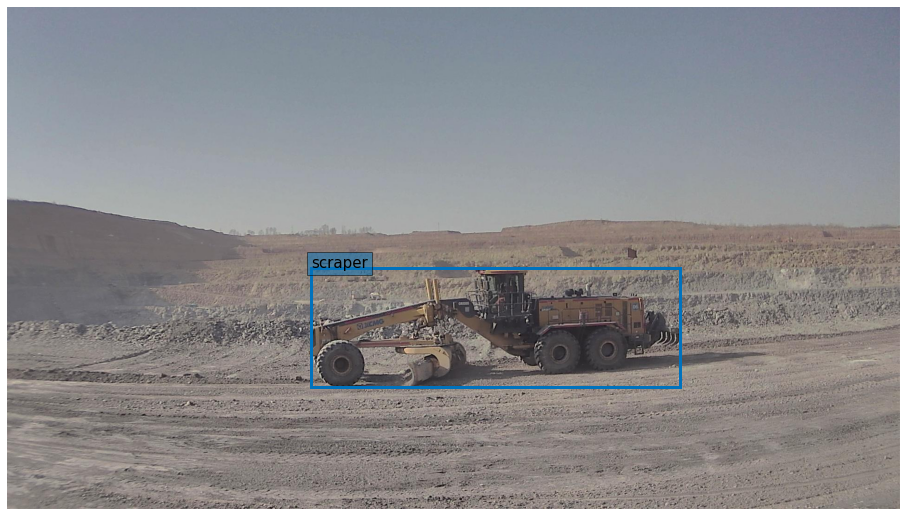

In [46]:
import numpy as np
im = Image.open("/content/working/train/1637044551.929307938.jpg")
xmin, ymin, xmax, ymax =  652.2844912400808,561.1936380094584,1447.2868107883248,818.3979033921773
text = 'scraper'

plt.figure(figsize=(16,10))
plt.imshow(im)
ax = plt.gca()
ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=COLORS[0], linewidth=3))
ax.text(xmin, ymin, text, fontsize=15, bbox=dict(facecolor=COLORS[0], alpha=0.5))
plt.axis('off')
plt.show()

In [9]:
# f = "/content/working/test/1642740587.692018032.jpg"
# import cv2
# im = cv2.imread(f)
# im.shape

(1080, 1920, 3)